In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train))

11501568/11490434 [==============================] - 0s 0us/step
60000


In [5]:
print(x_train[0].shape)
print('train data=', len(x_train))
print('test data=', len(x_test))
print('train image=', x_train.shape)
print('train label=', y_train.shape)

(28, 28)
train data= 60000
test data= 10000
train image= (60000, 28, 28)
train label= (60000,)


In [6]:
def plot_image(image):
 fig = plt.gcf()
 fig.set_size_inches(2, 2)
 #cmap ='binary' 灰階
 plt.imshow(image, cmap ='binary')
 plt.show()
 plot_image(x_train[500])

In [ ]:
def plot_images_labels_prediction(images, labels, prediction, idx,num=10):
 fig = plt.gcf()
 fig.set_size_inches(12, 14) #設定圖形⼤⼩
 if num>25: 
    num=25
 for i in range(0,num):
     ax=plt.subplot(5,5,1+i) #建立subgraph ⼦圖形5⾏*5列
     ax.imshow(images[idx],cmap='binary')# 畫出subgraphy⼦圖形
     title ='labels = '+ str(labels[idx])#⼦圖形標籤
     if len(prediction)>0: # 如果有預測值
         title +=",prediction="+str(prediction[idx]) # 標題加預測結果

     ax.set_title(title,fontsize=10) # 標題設定字體⼤⼩
     ax.set_xticks([]);ax.set_yticks([]) # 不顯⽰刻度
     idx+=1
 plt.show()
plot_images_labels_prediction(x_train, y_train, [], 0,25)
plot_images_labels_prediction(x_test, y_test, [], 0,25)

In [ ]:
x_Train=x_train.reshape(60000,784).astype('float32')
x_Test=x_test.reshape(10000,784).astype('float32')
print(x_Train[0])
print(x_Test[0])
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255
print(x_Train_normalize[0])
print(x_Test_normalize[0])

In [ ]:
y_train[:10]

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.utils.np_utils import to_categorical
y_Train_OneHot=to_categorical(y_train)
y_Test_OneHot=to_categorical(y_test)
print(y_Train_OneHot[:10])

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
model=Sequential()
model.add(Dense(units=256, # 隱藏層個數
     input_dim=784, # 輸入層28*28
     kernel_initializer='normal', # 常態法初始化權重
     activation='relu'))
print(model.summary())

In [ ]:
model.add(Dense(units=10, # 隱藏層個數
     kernel_initializer='normal', # 常態法初始化權重
     activation='softmax'))
print(model.summary())

In [17]:
model.compile(optimizer='adam', # adam 為深度學習最優化, 更快收斂, 提⾼準確度
 loss='categorical_crossentropy', #設定損失函數為cross_entropy 交叉熵 
 metrics=['accuracy']) # 模型評估的⽅法是採⽤正確率
train_history=model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2) #訓練

Epoch 1/10
240/240 - 3s - loss: 0.4340 - accuracy: 0.8844 - val_loss: 0.2243 - val_accuracy: 0.9365
Epoch 2/10
240/240 - 1s - loss: 0.1881 - accuracy: 0.9467 - val_loss: 0.1580 - val_accuracy: 0.9557
Epoch 3/10
240/240 - 1s - loss: 0.1330 - accuracy: 0.9626 - val_loss: 0.1236 - val_accuracy: 0.9654
Epoch 4/10
240/240 - 2s - loss: 0.1010 - accuracy: 0.9712 - val_loss: 0.1104 - val_accuracy: 0.9672
Epoch 5/10
240/240 - 2s - loss: 0.0805 - accuracy: 0.9775 - val_loss: 0.1020 - val_accuracy: 0.9700
Epoch 6/10
240/240 - 2s - loss: 0.0645 - accuracy: 0.9818 - val_loss: 0.0918 - val_accuracy: 0.9720
Epoch 7/10
240/240 - 1s - loss: 0.0534 - accuracy: 0.9854 - val_loss: 0.0875 - val_accuracy: 0.9735
Epoch 8/10
240/240 - 1s - loss: 0.0444 - accuracy: 0.9878 - val_loss: 0.0803 - val_accuracy: 0.9749
Epoch 9/10
240/240 - 1s - loss: 0.0367 - accuracy: 0.9902 - val_loss: 0.0841 - val_accuracy: 0.9748
Epoch 10/10
240/240 - 1s - loss: 0.0307 - accuracy: 0.9925 - val_loss: 0.0763 - val_accuracy: 0.9767

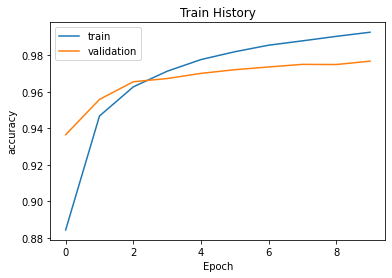

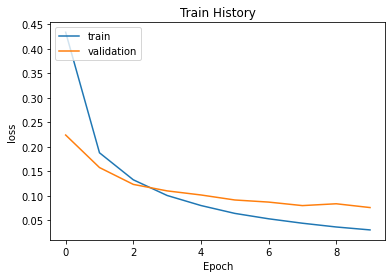

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()
show_train_history(train_history, 'accuracy' , 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [28]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot,verbose=1)
print('accuracy=',scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9780
accuracy= 0.9779999852180481


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


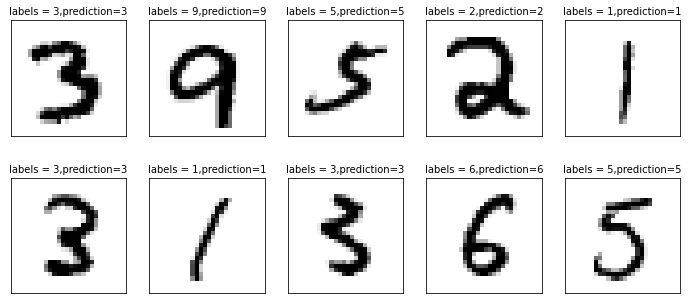

In [34]:
prediction=model.predict_classes(x_Test)
plot_images_labels_prediction(x_test, y_test, prediction, idx=500)

In [35]:
import pandas as pd
pd.crosstab(y_test,
 prediction,
 rownames=['label'],
 colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,1,0,0,1,1,3,0
1,0,1125,4,0,0,0,2,0,4,0
2,6,2,1007,3,1,0,2,3,8,0
3,2,0,1,995,0,2,0,4,4,2
4,1,0,3,0,956,0,6,1,2,13
5,3,0,0,10,1,861,7,1,7,2
6,7,3,1,1,2,3,939,0,2,0
7,0,6,11,4,0,0,0,996,2,9
8,5,0,2,9,2,1,2,2,949,2


In [36]:
df=pd.DataFrame({'label':y_test,'predict':prediction})
print(df[:10])

   label  predict
0      7        7
1      2        2
2      1        1
3      0        0
4      4        4
5      1        1
6      4        4
7      9        9
8      5        6
9      9        9


In [37]:
df[(df.label==2)&(df.predict==8)]

,label,predict
1790,2,8
3796,2,8
4248,2,8
4289,2,8
6744,2,8
8094,2,8
9700,2,8
9811,2,8
